# Exploratory Data Analysis on Data Science Salaries

### About the dataset

The Data Science Job Salaries Dataset contains 11 columns, which are;

    1. work_year: the year the salary was paid
    2. experience_level: the experience level in the job during the year
    3. employment_type: the type of employment for the role
    4. job_title: the role worked in during the year
    5. salary: the total gross salary amount paid
    6. salary_currency: the currency of the salary paid as an ISO 4217 currency code
    7. salaryinusd: the salary in USD
    8. employee_residence: the employee's primary country of residence during the work year as an ISO 3166 country code
    9. remote_ratio: the overall amount of work performed remotely
    10. company_location: the country of the employer's main office
    11. company_size: the median number of people that worked for the company during the year

### Notebook Goal

The goal of the notebook is to:

1. Explore every feature in the dataset
2. Perform a Work Year Analysis
3. Perform a Experience Level Analysis
4. Perform a Company Location Analysis
5. Perform a Salary Analysis

### Importing necessary libraries

In [6]:
#install
# !pip install country_converter
# !pip install missingno

#data
import pandas as pd
import numpy as np
import country_converter as coco

#visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

#styling
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)

#read dataframe
df = pd.read_csv('ds_salaries.csv')
df.drop(df[['salary', 'salary_currency', 'Unnamed: 0']], axis=1, inplace=True)

In [9]:
df.shape

(607, 9)

In [10]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,IN,100,US,L


We have 9 columns with 607 rows:

3 numeric columns:
- work_year
- salary_in_usd
- remote_ratio

6 categorical columns:
- experience_level
- employment_type
- job_title
- employee_residence
- company_location
- company_size

Text(0.5, 1.0, 'Distribution of Missing Values')

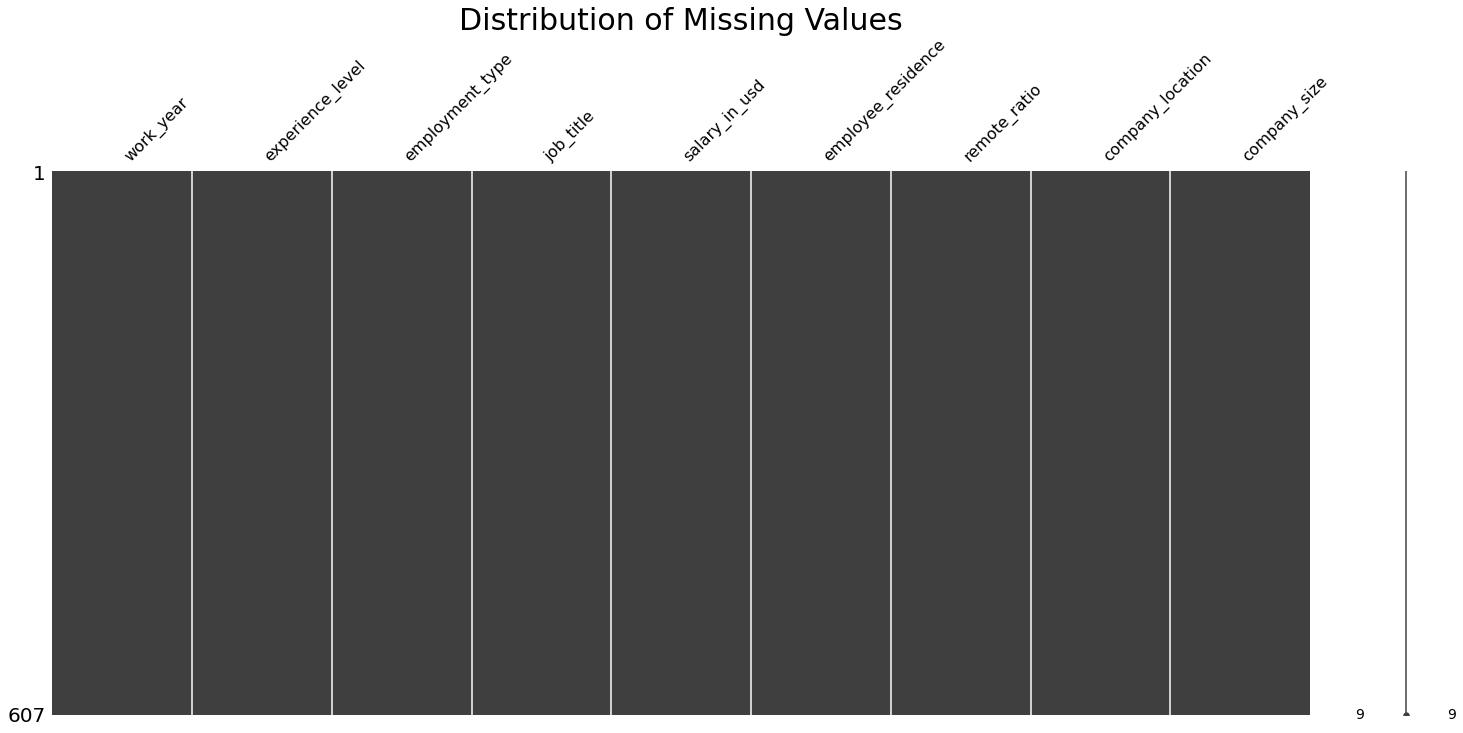

In [11]:
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30)

It is clear that we have no missing values in this dataset.

## Univariate Analysis

In this section we will explore each column in the dataset to get an idea for the distribution of features

### Categorical Columns

As mentioned above there are 6 categorical columns in the dataset. Let's take a look at the experience level first.

#### Experience Level

df['experience_level'].unique()

In [14]:
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

There are 4 values within this column:

`EN` - Entry Level / Junior

`MI` - Mid-Level / Intermediate

`SE` : Senior Level / Expert

`EX` : Executive Level / Director

Let's change the values so they make a bit more sense to the user

In [17]:
experience_dictionary = {
    'EN':'Entry Level / Junior',
    'MI':'Mid-Level / Intermediate',
    'SE':'Senior Level / Expert',
    'EX':'Executive Level / Director'
}

df = df.replace({'experience_level':experience_dictionary})
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level / Intermediate,FT,Data Scientist,79833,DE,0,DE,L
1,2020,Senior Level / Expert,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior Level / Expert,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid-Level / Intermediate,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior Level / Expert,FT,Machine Learning Engineer,150000,US,50,US,L


In [25]:
ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level,
                path = [ex_level.index],
                values = ex_level.values,
                title = 'Treemap on Experience Level',
                color = ex_level.index,
                width = 1000, height = 500)

fig.show()

c:\Users\Umar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

